In [2]:
import numpy as np
import matplotlib.pyplot as plt

Training data shape:  (3000, 2)
Test data shape:  (600, 2)
Merged data shape:  (3600, 2)


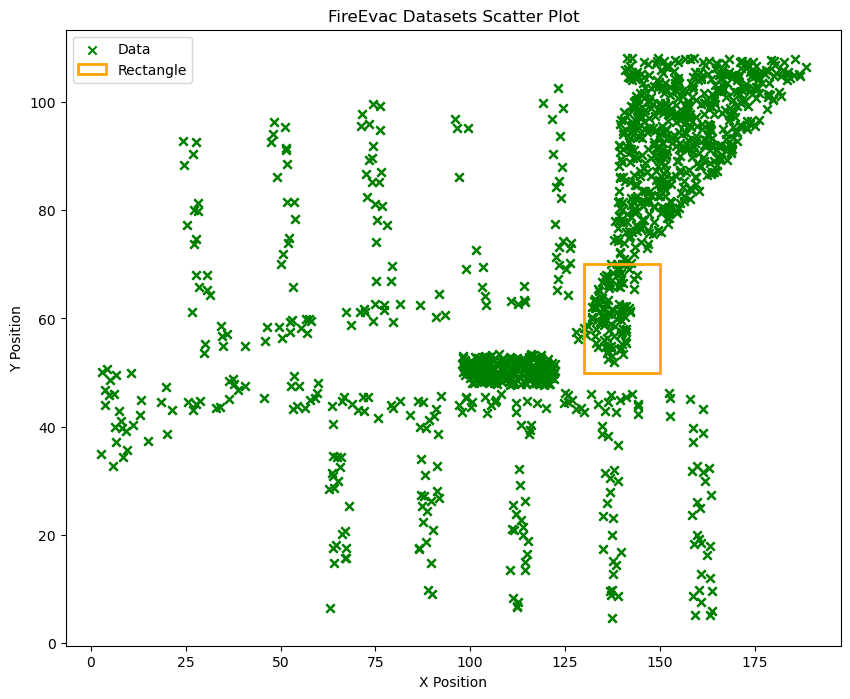

In [3]:
# Load the FireEvac dataset
train_data = np.load('./dataset/FireEvac_train_set.npy')
test_data = np.load('./dataset/FireEvac_test_set.npy')

print("Training data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)

# Extract x and y positions for training data
x_train = train_data[:, 0]
y_train = train_data[:, 1]

# Extract x and y positions for test data
x_test = test_data[:, 0]
y_test = test_data[:, 1]

# Merge these two datasets
data = np.concatenate((train_data, test_data), axis=0)

print("Merged data shape: ", data.shape)

# Create an plot
plt.figure(figsize=(10, 8))

# Create a scatter plot for training data (green color)
plt.scatter(data[:,0], data[:,1], marker='x', s=35, color='green', label='Data')

rectangle = plt.Rectangle((130, 50), 20, 20, linewidth=2, edgecolor='orange', facecolor='none', label='Rectangle')
plt.gca().add_patch(rectangle)

# Set plot labels and title
plt.title('FireEvac Datasets Scatter Plot')
plt.xlabel('X Position')
plt.ylabel('Y Position')

# Show legend
plt.legend()

# Show the plot
plt.show()

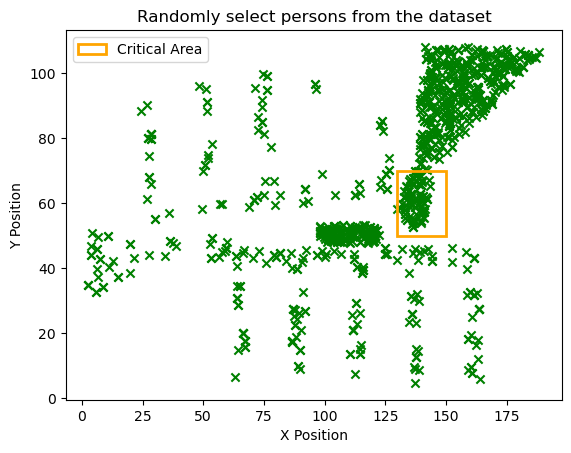

Number of people extracted: 1032


In [44]:
import numpy as np

def extract_people_count(dataset, rectangle_corner, rectangle_width, rectangle_height, stop_count):
    """
    Extracts people count from a dataset within a rectangular range until stop_count is reached.

    Parameters:
    - dataset: 2D array representing the dataset with columns [x_position, y_position].
    - rectangle_corner: Tuple representing the bottom-left corner of the rectangular range (x, y).
    - rectangle_width: Width of the rectangular range.
    - rectangle_height: Height of the rectangular range.
    - stop_count: The desired stop count.

    Returns:
    - count: The number of people extracted from the dataset within the rectangular range.
    """

    count = 0
    total_count = 0 

    while count < stop_count:
        # Randomly select a person from the dataset
        random_person = dataset[np.random.randint(len(dataset))]
        
        # Check if the person is within the rectangular range
        x, y = random_person
        total_count += 1
        plt.scatter(x, y, marker='x', s=35, color='green')

        if (
            x >= rectangle_corner[0]
            and x <= rectangle_corner[0] + rectangle_width
            and y >= rectangle_corner[1]
            and y <= rectangle_corner[1] + rectangle_height
        ):
            count += 1
            

    rectangle = plt.Rectangle((130, 50), 20, 20, linewidth=2, edgecolor='orange', facecolor='none', label='Critical Area')
    plt.gca().add_patch(rectangle)

    # Set plot labels and title
    plt.title('Randomly select persons from the dataset')
    plt.xlabel('X Position')
    plt.ylabel('Y Position')

    # Show legend
    plt.legend()

    # Show the plot
    plt.show()
    return total_count

# Usage:
rectangle_corner = (130, 50)
rectangle_width = 20
rectangle_height = 20
stop_count = 100

result = extract_people_count(data, rectangle_corner, rectangle_width, rectangle_height, stop_count)
print(f"Number of people extracted: {result}")


In [52]:
def extract_people_count(dataset, rectangle_corner, rectangle_width, rectangle_height, stop_count):
    """
    Extracts people count from a dataset within a rectangular range until stop_count is reached.

    Parameters:
    - dataset: 2D array representing the dataset with columns [x_position, y_position].
    - rectangle_corner: Tuple representing the bottom-left corner of the rectangular range (x, y).
    - rectangle_width: Width of the rectangular range.
    - rectangle_height: Height of the rectangular range.
    - stop_count: The desired stop count.

    Returns:
    - count: The number of people extracted from the dataset within the rectangular range.
    """

    count = 0
    total_count = 0 

    while count < stop_count:
        # Randomly select a person from the dataset
        random_person = dataset[np.random.randint(len(dataset))]
        
        # Check if the person is within the rectangular range
        x, y = random_person
        total_count += 1

        if (
            x >= rectangle_corner[0]
            and x <= rectangle_corner[0] + rectangle_width
            and y >= rectangle_corner[1]
            and y <= rectangle_corner[1] + rectangle_height
        ):
            count += 1
        
    return total_count

# Usage:
rectangle_corner = (130, 50)
rectangle_width = 20
rectangle_height = 20
stop_count = 100

results_list = [extract_people_count(data, rectangle_corner, rectangle_width, rectangle_height, stop_count) for _ in range(100000)]

# Calculate mean and median of the results
mean_result = np.mean(results_list)
median_result = np.median(results_list)

print(f"Mean of results: {mean_result}")
print(f"Median of results: {median_result}")

Mean of results: 1249.59795
Median of results: 1246.0
